In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

db=mysql.connector.connect(host="localhost",
                            username="root",
                            password="root",
                            database="ecommerce2")
cur=db.cursor()


In [2]:
#list all unique cities where customers are locted.
query=""" select distinct customer_city from customers """
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data)
df.head(7)


,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
5,jaragua do sul
6,timoteo


In [5]:
# Count the number of orders placed in 2017
query=""" select count(order_id)from orders where year(order_purchase_timestamp)= 2017 """

cur.execute(query)

data=cur.fetchall()

"The Total orders placed are in 2017 ",data[0][0]

('The Total orders placed are in 2017 ', 135303)

In [17]:
#Find the total sales of category.

query=""" select upper(products.product_category) category,
round(sum(payments.payment_value),2) sales
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id=order_items.order_id
group by category"""

cur.execute(query)

data=cur.fetchall()
#data
df=pd.DataFrame(data, columns = ["Category", "Sales"])
df

,Category,Sales
0,PERFUMERY,13681943.82
1,FURNITURE DECORATION,38614762.58
2,TELEPHONY,13145815.37
3,FASHION BAGS AND ACCESSORIES,5890273.56
4,BED TABLE BATH,46238949.12
...,...,...
69,CDS MUSIC DVDS,32384.61
70,LA CUISINE,78665.31
71,FASHION CHILDREN'S CLOTHING,21213.09
72,PC GAMER,58709.61


In [22]:
#Calculate the percenttage of orders that were paid in installments.
query=""" select (sum(case when payment_installments >=1 then 1
else 0 end))/count(*)*100 from payments"""

cur.execute(query)

data=cur.fetchall()
"The percentage of oreders that were paid in installment",data[0][0]


('The percentage of oreders that were paid in installment', Decimal('99.9981'))

#Count the number of customers from each state:

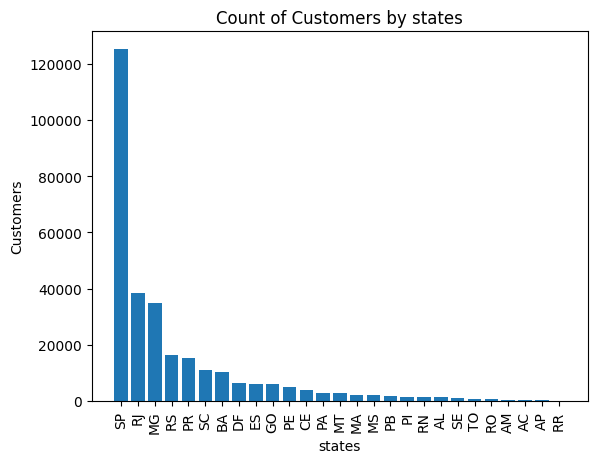

In [14]:
query = """ select customer_state ,count(customer_id)
from customers group by customer_state"""

cur.execute(query)
data= cur.fetchall()
df=pd.DataFrame(data, columns=["state", "customer_count"])
df=df.sort_values(by ="customer_count", ascending=False)
plt.figure(figure=(8,4))
plt.bar(df["state"], df["customer_count"])
plt.xlabel("states")
plt.ylabel("Customers")
plt.title("Count of Customers by states")
plt.xticks(rotation=90)
plt.show()

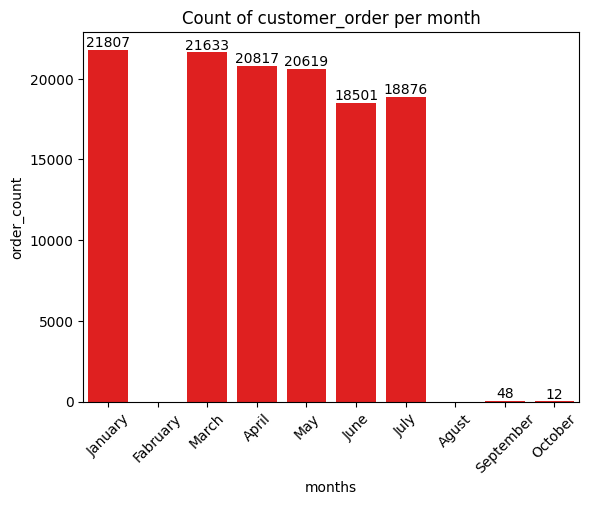

In [20]:
#Calculate the number of orders per moth in 2018
query=""" Select monthname(order_purchase_timestamp) months, count(order_id) order_count from orders where year(order_purchase_timestamp)=2018
group by months"""

cur.execute(query)

data=cur.fetchall()
#data
df=pd.DataFrame(data, columns=["months","order_count"])
o=["January","Fabruary","March","April","May","June","July","Agust","September","October"]
ax=sns.barplot(x=df["months"], y= df["order_count"], data=df,order=o,color="red")
plt.title("Count of customer_order per month")
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.show()

In [27]:
#Find the averge number of products per order, grouped by customer city.
query=""" with count_per_order as
(select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id=order_items.order_id
group by orders.order_id,orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) average_orders
from customers join count_per_order
on customers.customer_id=count_per_order.customer_id
group by customers.customer_city;
"""

cur.execute(query)

data=cur.fetchall()
#data
df=pd.DataFrame(data, columns=["customer city","average orders"])
df.head(10 )

,customer city,average orders
0,sao jose dos campos,10.25
1,indaial,10.04
2,treze tilias,11.45
3,sao paulo,10.41
4,rio de janeiro,10.32
5,mario campos,12.00
6,guariba,9.00
7,cuiaba,10.78
8,franca,11.26
9,tocos,9.00


In [7]:
#Identify the correlation between product price and the number of times a product has been puchased.
query="""
select products.product_category,
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id=order_items.product_id
group by products.product_category"""

cur.execute(query)

data=cur.fetchall()
#data
df=pd.DataFrame(data, columns=["Category","order_count","price"])


arr1=df["order_count"]
arr2=df["price"]
a=np.corrcoef([arr1, arr2])
print("The correltion between price and number of times a product has been purchesd is",a[0][1])

The correltion between price and number of times a product has been purchesd is -0.10631514167157556


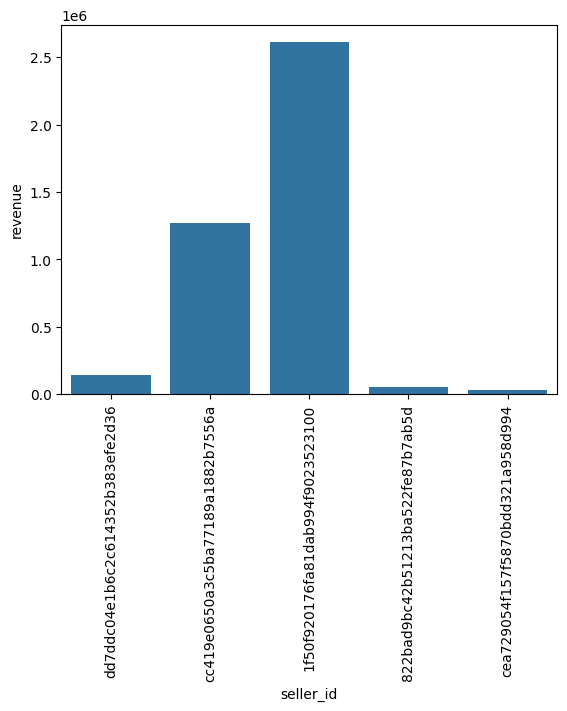

In [3]:
#calculate total revenue generated by each salar tha rank them of 
query="""select order_items.seller_id, sum(payments.payment_value)
 from order_items join payments
on order_items.order_id=payments.order_id
group by order_items.seller_id """

cur.execute(query)
data=cur.fetchall() 
df=pd.DataFrame(data,columns=["seller_id", "revenue"])
df=df.head()
sns.barplot(x="seller_id", y="revenue", data=df)
plt.xticks(rotation=90)
plt.show()



query="""select customer_id, order_purchase_timestamp, payment,
avg (payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp,
payments.payment_value as payment
from payments join orders
on payments.order_id=orders.order_id) as a"""
cur.execute(query)
data=cur.fetchall() 
df=pd.DataFrame(data)
df

In [10]:
query="""select customer_id, order_purchase_timestamp, payment,
avg (payment) over(partition by customer_id order by order_purchase_timestamp 
rows between 2 preceding and current row) as mov_avg 
from 
(select orders.customer_id, orders.order_purchase_timestamp, payments.payment_value as payment from payments join orders on payments.order_id=orders.order_id) as a""" 
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data) 
df



,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
...,...,...,...,...
934969,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
934970,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
934971,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
934972,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001


In [3]:
#Calculate the retention rate of customers,defined as the percentage of customer who make anothers purches 
#with in six months of their first purchase

query="""with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id=orders.customer_id
group by customers.customer_id)
select a.customer_id, count(distinct orders.order_purchase_timestamp)
from a join orders
on orders.customer_id=a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order,interval 18 month)
group by a.customer_id"""

cur.execute(query)
data=cur.fetchall()
data

[]

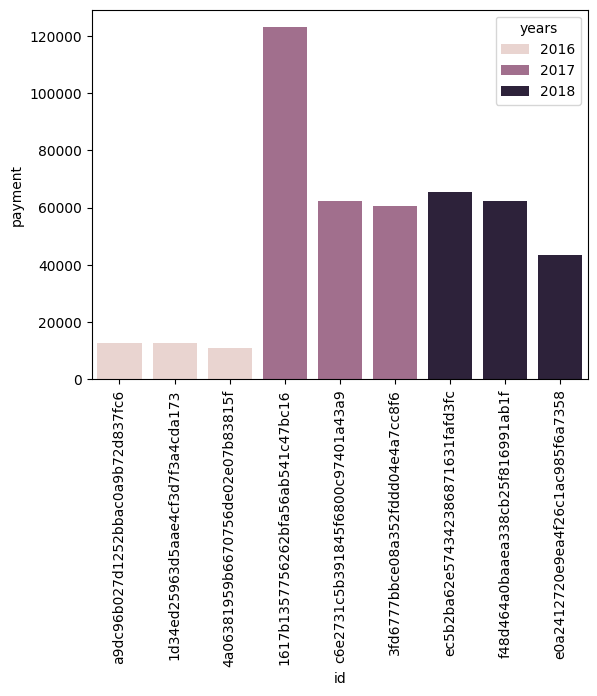

In [7]:
#Identify the top 3 customers who spent the most money in each year.

query="""select years, customer_id,payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment, 
dense_rank() over (partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value)desc) d_rank
from orders join payments
on payments.order_id=orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank<=3"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data, columns=["years", "id","payment", "rank"])
sns.barplot(x="id", y="payment", data=df, hue="years")
plt.xticks(rotation=90)
plt.show()
